# Analyzing Shop Customer Data

The following data is obtained from kaggle. The data set has 8 unique columns and 2000 unique customers. We are going to take a look at some patterns and relationships between different variables within the data and see if any are dependent on each other. This can help us draw conclusions about the data and how changing one variable may affect the other variables.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Go to the following url and sign into your kaggle account. Once signed in, you can click on the download button at the top of the page and it will download a zip file onto your computer. Form here, you can upload the file you want to the jupiter notebook and read it using pandas.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = "https://www.kaggle.com/datasets/datascientistanna/customers-dataset"

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thathwikpodugu
Your Kaggle Key: ········


100%|██████████| 23.2k/23.2k [00:00<00:00, 14.1MB/s]

This step is where we download the dataset into the jupyter notebook. You need a free kaggle account in order to successfully complete this step because it requires a kaggle key which is otherwise unobtainable.

In [4]:
data_dir = "./customers-dataset"

In [5]:
import os
os.listdir(data_dir)

['Customers.csv']

The code above shows that the download has a single csv file with all of the information that we will be using and analyzing.

In [ ]:
project_name = "customer-shop-analysis" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

In this section, we clean and sparse the data to make it more usable in our analysis. My data is very simple and only requires that a few rows be deleted because of missing values. However, as datasets get more complicated and have more categorical data and wrong values, more cleaning has to be done in order to make it valid for analysis.



In [8]:
import pandas as pd

customers_df = pd.read_csv("customers-dataset/Customers.csv")
customers_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [9]:
customers_df.shape

(2000, 8)

There are 2000 different customers in the dataset and each one has 8 different variables that can be explored

In [3]:
customers_df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Using the .describe() method, we get summary statistics for the entire database. From this we can see that:
 - The average customer age is 49 years old
 - The Average work experience is 4.1 years
 - The average spending score for all the customers is 51
 - The maximum annual income is $189974  
 - The largest family size is 9

In [4]:
pd.unique(customers_df["Profession"])

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

Using the .unique() method, we see that there are 9 unique professions but some of the rows have null values. We will just remove these rows so that the calculations and predictions we perform on the data won't be skewed by these invalid values.

In [5]:
customers_df.dropna(axis = 0, inplace = True)
pd.unique(customers_df["Profession"])

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

Now all the rows with missing profession values have been dropped and the data can analyzed.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Exploratory Analysis and Visualization

Here we will look at some of the values in the dataset and different variables and how they affect one another. This is a good way to see if there's any relationships between the variables in the data and it helps us see how changing one variable may affect the others.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

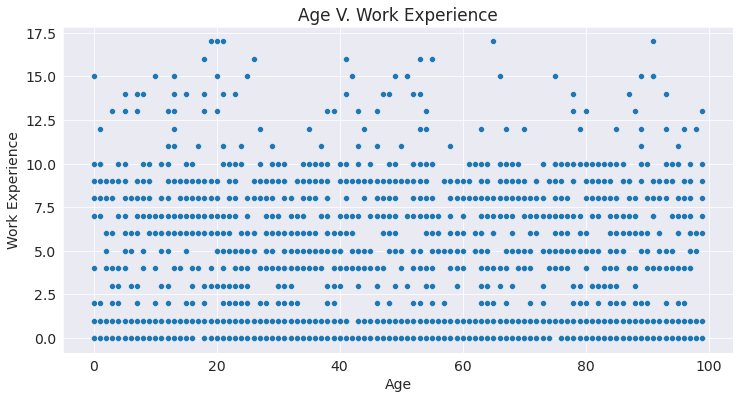

In [7]:
sns.scatterplot(x = customers_df["Age"],
                y = customers_df["Work Experience"]).set(title = "Age V. Work Experience");


We use seaborn's built in scatterplot function to produce a scatter plot of the age of customers and their work experience. We can see that there are people of all ages between 1 to 100. The work experience is skewed right with most of the data points being below ten years. There are only a few points above that threshold.

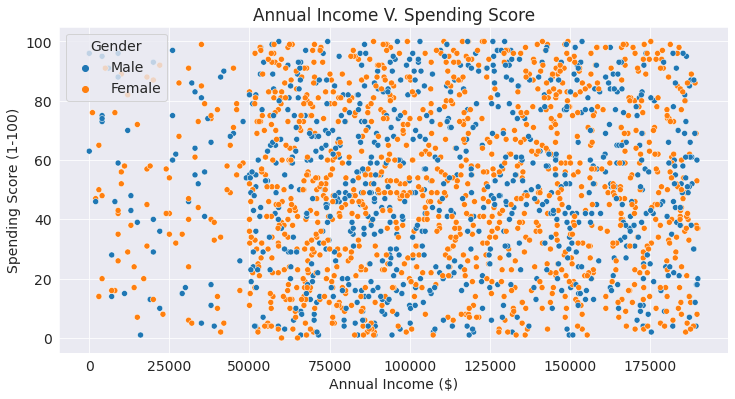

In [8]:
sns.scatterplot(x = customers_df["Annual Income ($)"], 
                y = customers_df["Spending Score (1-100)"],
                hue = customers_df.Gender).set(title = "Annual Income V. Spending Score");

The above scatterplot shows the relationship between annual income and the customer's spending score and the different hues represent the customers' genders. From the graph we can see:
- There is no real difference between the male and female customers in terms of annual income and spending score
- A majority of the incomes are higher than $50,000 per annum


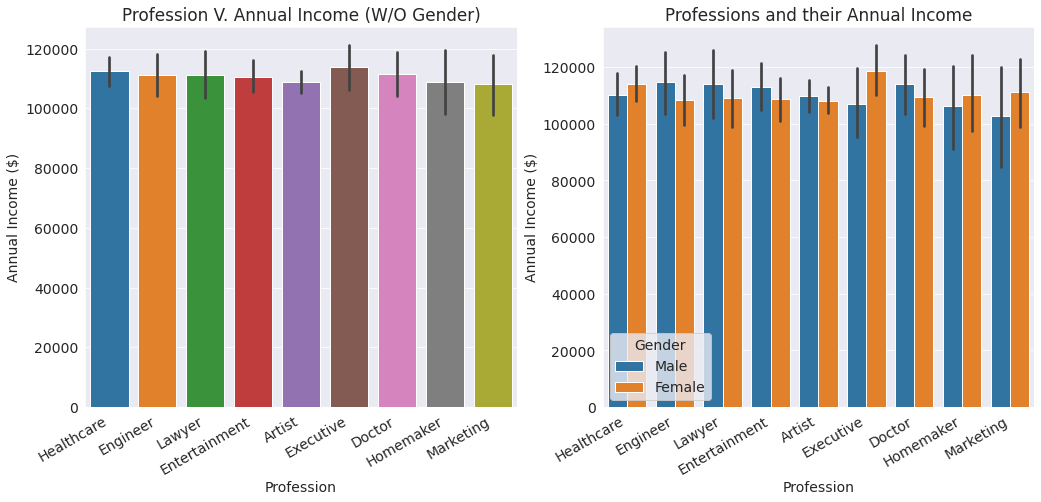

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (17,7));


# Average Annual Income (No gender)
axes[0].set_title("Profession V. Annual Income (W/O Gender)")
ax1 = sns.barplot(x = customers_df.Profession,
            y = customers_df["Annual Income ($)"],
            ax = axes[0]);

# Fix overlapping x labels with the following code
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30, ha = "right")

#Average Annual Income (W/ Gender)
axes[1].set_title("Professions and their Annual Income")
ax2 = sns.barplot(x = customers_df.Profession,
            y = customers_df["Annual Income ($)"], 
            hue = "Gender", 
            data = customers_df,
            ax = axes[1]);

# Fix labels again for graph 2
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30, ha = "right")
plt.show()

The above creates two barplots that both compare the profession and the annual income. The graph on the left doesn't include gender while the bar on the right does. 

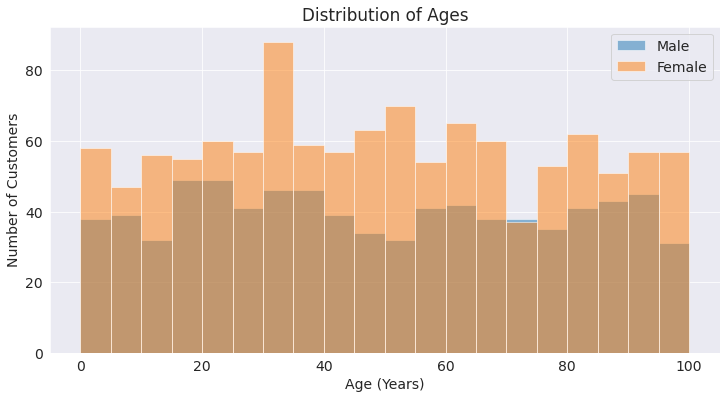

In [12]:
import numpy as np
plt.title("Distribution of Ages")
female_df = customers_df[customers_df.Gender == "Female"]
male_df = customers_df[customers_df.Gender == "Male"]
plt.hist(male_df.Age,
         bins = np.arange(0, 101, 5), 
         alpha = .5);
plt.hist(female_df.Age,
         bins = np.arange(0, 101, 5),
         alpha = .5);

plt.xlabel("Age (Years)")
plt.ylabel("Number of Customers")
plt.legend(["Male", "Female"]);

The histogram shows the distribution of ages of all of the customers. The ages are split by gender and this shows a clear pattern. This could be because of unknown variables that aren't presented in the data set. 

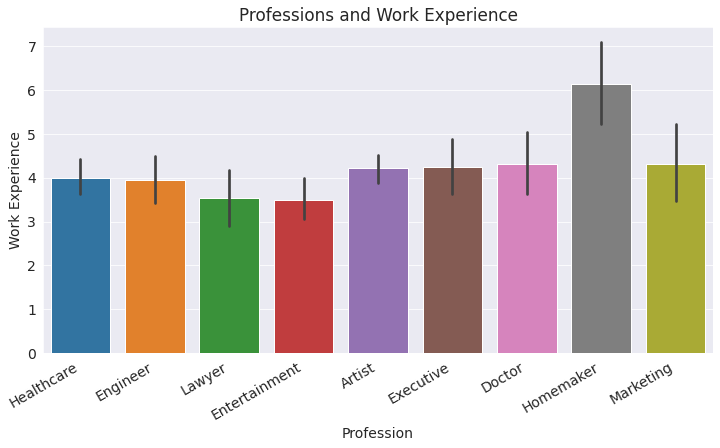

In [16]:
plt.title("Professions and Work Experience")
bp = sns.barplot(x = customers_df["Profession"],
            y = customers_df["Work Experience"],
            data = customers_df);

bp.set_xticklabels(bp.get_xticklabels(), rotation = 30, ha = "right");

Using seaborn we can make a barplot that displays the average work experience of each profession. We can see that:
- The standard deviations for each bar is fairly low
- There is a clear difference of work experience for some of the professions

The fact that there is a low standard deviation for each bar means that we can trust the data. There isn't much variation meaning that any conclusions we come to about the relationship between the profession and work experience.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

In this section we will be asking some questions about the dataset and seeing if we can come to an answer by looking at the data and looking at the connection between the different variables. For some questions, more data may be required to come to a conclusive answer.


#### Q1: Is there an association between the age of the customer and their work experience?

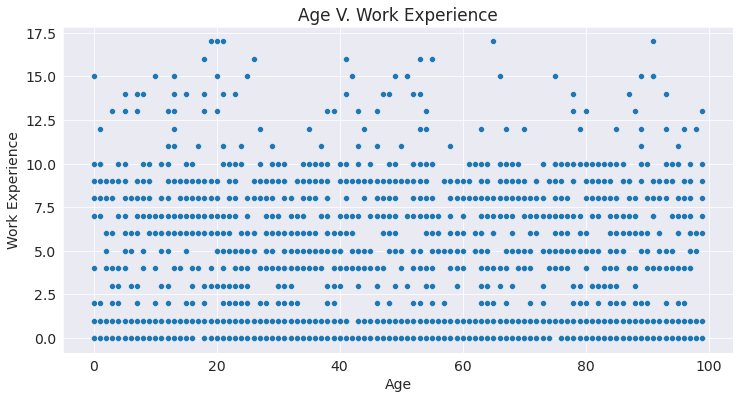

In [9]:
sns.scatterplot(x = customers_df["Age"],
                y = customers_df["Work Experience"]).set(title = "Age V. Work Experience");


From the resulting scatterplot, we can see that there is no real association between age and work experience. The dots are mostly distributed evenly across the age groups with no observable skew. 

#### Q2: Does the annual income of a customer affect their average spending score?

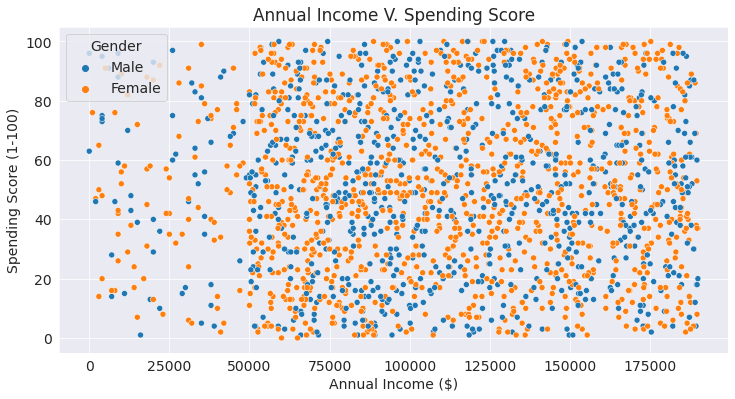

In [24]:
sns.scatterplot(x = customers_df["Annual Income ($)"], 
                y = customers_df["Spending Score (1-100)"],
                hue = customers_df["Gender"]).set(title = "Annual Income V. Spending Score");

The scatter plot above is quite widespread. There is no real pattern that becomes apparent at first glance. There appears to be a cutoff of annual income at around $50,000 because there are very few data points (relatively speaking) below that threshold. Also, gender appears to have no affect on the relationship either. Both males and females are evenly distributed across the plot.

#### Q3: Do some professions earn higher annual wages than other professions?

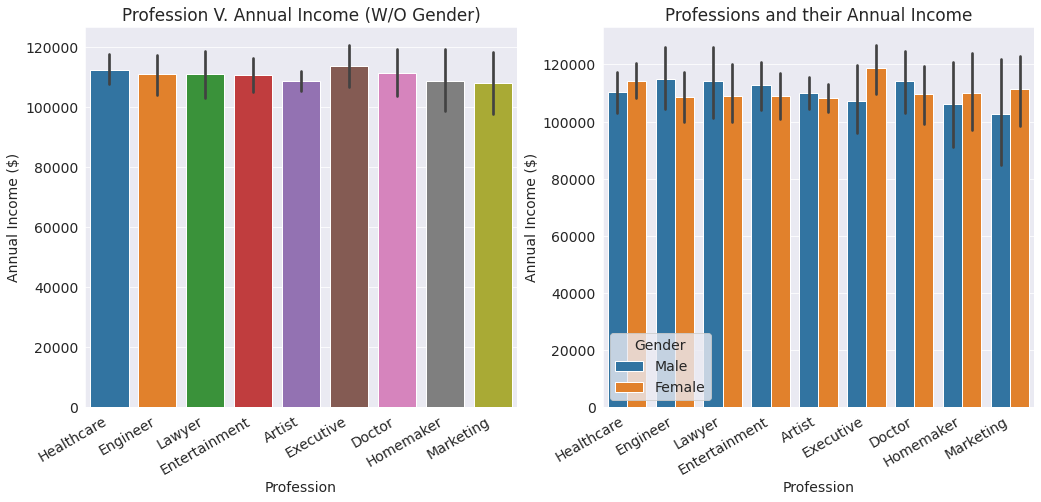

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (17,7));

# Average Annual Income (No gender)
axes[0].set_title("Profession V. Annual Income (W/O Gender)")
ax1 = sns.barplot(x = customers_df.Profession,
            y = customers_df["Annual Income ($)"],
            ax = axes[0]);

# Fix overlapping x labels with the following code
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30, ha = "right")

#Average Annual Income (W/ Gender)
axes[1].set_title("Professions and their Annual Income")
ax2 = sns.barplot(x = customers_df.Profession,
            y = customers_df["Annual Income ($)"], 
            hue = "Gender", 
            data = customers_df,
            ax = axes[1]);

# Fix labels again for graph 2
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30, ha = "right")
plt.show()

The graphs above show the distribution of professions and their annual income. We can see that:
- Elective positions seem to make the most money per year on average
- Marketing seems to make the least money per year on average
- Males and females seem to make the same amount per year for every profession (there is no statistical gender wage gap for this data)

We often hear news about the gender wage gap and how females get paid less then men even though they work the same position. However, looking at this dataset, that doesn't seem to be true. The error bars overlap for all of the bars meaning there is no statistical evidence of a difference between the bars. However, since the dataset is relatively small, we can't generalize to the whole population of working people around the world. So the gender gap may still exist but it doesn't just in this case.

#### Q4: Is there a difference between the distribution of ages of male and female?

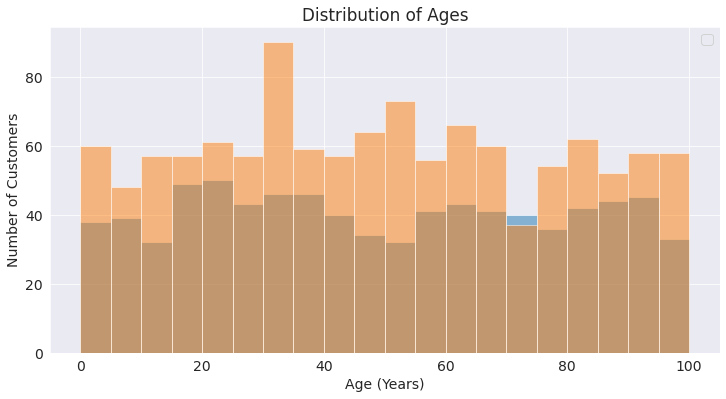

In [21]:
import numpy as np
# Set some values for the title and axes of the graph
plt.title("Distribution of Ages")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Customers")
plt.legend(["Male", "Female"])

# Create the actual graph
female_df = customers_df[customers_df.Gender == "Female"]
male_df = customers_df[customers_df.Gender == "Male"]
plt.hist(male_df.Age,
         bins = np.arange(0, 101, 5), 
         alpha = .5);
plt.hist(female_df.Age,
         bins = np.arange(0, 101, 5),
         alpha = .5);



From the graph we can clearly see a pattern:

- On average the female customers are older than male customers
- The distribution of ages is mostly uniform with an abnormal peak in the 30-35 bin

The reason for the difference between the ages of women and men is hard to explain. There could be other factors at play that aren't shown in the data. For example, it could be because women face more discrimination when it comes to the work environment. Thus it takes them longer to get jobs and get employment than a man. This could be a confounding variable that affects the data. To come to a comprehensive conclusion, more data is required. Without this extra data, there is no certainty within our analysis.

#### Q5: What does the distribution of work experience look and does profession have any affect on it?

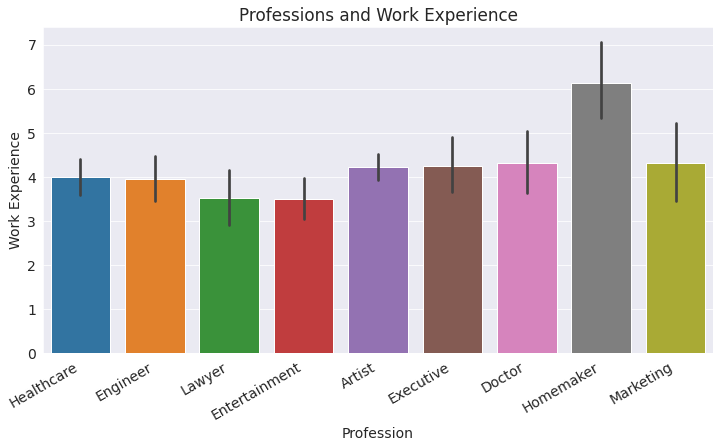

In [18]:
plt.title("Professions and Work Experience")
bp = sns.barplot(x = customers_df["Profession"],
            y = customers_df["Work Experience"],
            data = customers_df);

bp.set_xticklabels(bp.get_xticklabels(), rotation = 30, ha = "right");

When we make a bar plot of the two variable we can see that:

- Homemakers have the highest average work experience
- Customers who work in entertainment have the lowest work experience
- The rest of the professions have very similar work experience to each other

This disparity might be due to the complexity of the profession or the number of years of education required for the profession. For example, homemaking may be a complicated job so in order to get into the field you may need more prior work experience to be successful. For doctors it might be the second case where they spend more time in school/university getting a degree so they have less time to work. This would bring down the total average for their bar.

Let us save and upload our work to Jovian before continuing.

In [17]:
import jovian

In [1]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "thathwikp/customer-shop-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/thathwikp/customer-shop-analysis


'https://jovian.com/thathwikp/customer-shop-analysis'

## Inferences and Conclusion

From the analysis of the dataset we can come to the following conclusions:

- There appears to be no statistically significant difference in the annual income of different professions. Most of the professions make similar amounts per annum and gender doesn't play a huge role in this relationship either
- From the data, there seems to be no observable gender wage gap across all professions. However, this statement can't be generalized to the whole population since our sample size is small and it may not be representative of the whole population.
- There is a disparity between the age distributions of men and of women. Women, on average, tend to be older than men in the work environment. This could be due to the increased discrimination they face when trying to join the work force.
- Most of the professions have similar work experience except for homemakers. They're work experience, on average, is higher than that of the other professions. This can be due to the level of education required for the position and also the complexity/toughness of the job.


In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "thathwikp/customer-shop-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/thathwikp/customer-shop-analysis


'https://jovian.com/thathwikp/customer-shop-analysis'

## References and Future Work

As stated before, a larger sample with more variables can allow us to make more predictions on the data with even more accuracy. Some of the conclusions we've drawn can't be fully trusted since the sample size is small and there isn't enough data to work with. Sometimes that is the reality of a dataset and analysts have to work around these limitations and, to their best ability, answer questions about the relationships between different data.

#### References

 - Basic python syntax and help: https://www.w3schools.com/python/
 - Specific questions about certain topics: https://stackoverflow.com/
 - Seaborn guide and documentation: https://seaborn.pydata.org/tutorial.html
 - Pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html
 - Matplot lib documentation: https://matplotlib.org/3.3.1/users/index.html
 

In [27]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>